# Deploying the Product:

This workbook is a preliminary form of deployment for the project.  The notebook is built in a way for a user to go through the following steps:
- Input a latitude and longitude of a given location.  
    - If you're stuck on finding lat and lon, you can use Google Maps [here](https://www.google.com/maps)
    - Clicking on any point will show you the latitude and longitude at the bottom of the screen
    
The notebook handles these next steps automatically:
- Load the pre-trained convolutional neural network model
- Run an API call to load and display an image of the location referenced
- Run the image through the neural network and record and display the results

If all goes well, the model should give the user a good idea of whether or not that location is at risk of a wildfire.

If you have trouble finding a good spot on the map to test the model on, feel free to use these spots on the map from California that recently experienced wildfires.  As this occurred in California, it is well outside of the training or validation set, and as such, should be a good measure for how the model performs.  The model should indicate that these areas are at high risk of a wildfire.
- 37.882, -119.643
- 40.53927, -122.56656
- 34.244649, -117.964838

Please feel free to look up locations of wildfires and test it out further, though!

note: For now, this won't work as the API key is held on my computer as well as the trained model (it's over 200 mb. . . ), but if you go through the steps of the other notebooks and get your hands on a Google Static Maps API key, you can run this notebook yourself with very few alterations.

# Import Libraries:

In [1]:
# Standard data science libraries:
import pandas as pd
import numpy as np

import requests
import urllib.request
from IPython.display import Image, display

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

import warnings
warnings.filterwarnings('ignore')

# Creating the Function:

In [2]:
def test_location():
    lat = input('Please enter a latitude: ')
    lon = input('Please enter a longitude: ')
    center = lat + ',' + lon

    # Importing the Key:
    key = open(r"C:\Users\thoma\Desktop\gmap_api_key.txt", 'r').read()
    img_size = '350x350' # Let's try this for now.  Gets multiplied by scale for resolution
    img_format = 'jpg' # For compressability (is that a word?) png is 'png8' for 8 bit and 'png32' for 32 bit
    map_scale = '1' # For scale parameter. 
    maptype = 'satellite' # Obvious reason
    zoom = '15' # Zoom I used for the original neural network

    # Chopping the URL into manageable pieces 
    a = 'https://maps.googleapis.com/maps/api/staticmap?' # Base of the url
    b = 'center='  
    c = '&zoom=' # Zoom
    d = '&maptype=satellite' # Map type 
    e = '&size=' # Image Size
    f = '&key='

    # Creating the URL:
    url1 = a + b
    url2 = c + zoom + d + e + img_size + f + key
    # URL = url1 + row['center'] + url2

    # Showing the Image:
    url = url1 + center + url2

    # Saving the Image:
    urllib.request.urlretrieve(url, 
                                   r"C:\Users\thoma\Desktop\deployment\wf\\"
                                   + 'test1' 
                                   + '.jpg')

    # Loading the presaved model:
    model = load_model('cnn1.h5')

    # Path for the new image:
    dep_folder = r"C:\Users\thoma\Desktop\deployment"

    # Reshaping formula
    dep_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                    dep_folder, 
                    target_size=(350, 350), batch_size = 1)
    # Formatting the image
    dep_img, dep_lab = next(dep_generator)

    # Making the prediction
    prediction = 1 - (model.predict(dep_img)[0])
    print ('Wildfire Risk Percentage:', '{: .2%}'.format(prediction.flat[0]))

    r = requests.get(url)
    display(Image(r.content))

# Testing the Network:

Please enter a latitude: 34.244
Please enter a longitude: -117.964838
Found 1 images belonging to 1 classes.
Wildfire Risk Percentage:  71.87%


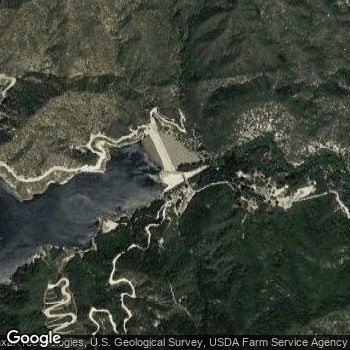

In [3]:
test_location()

# Conclusion:

This is an easy way to test the solution I have built for this problem in an simple manner.  The next step will be a fully functional web application, but for now, the solution works quite well for testing individual locations!

Thanks for checking it out, and I'll be continuing to improve this model in the future!

-Thomas